In [1]:
import openai
import os
import IPython
from langchain.llms import OpenAI
from dotenv import load_dotenv

In [2]:
import pandas as pd

df = pd.read_excel('LinkedIn100Reviews.xlsx')


In [3]:
# load_dotenv()

# api_key  = os.environ['OPENAI_API_KEY']
# # API configuration
# openai.api_key = os.getenv(api_key)

In [4]:
# def set_open_params(
#     model="gpt-3.5-turbo",
#     temperature=0,
#     max_tokens=256,
#     top_p=1,
#     frequency_penalty=0,
#     presence_penalty=0,
# ):
#     """ set openai parameters"""

#     openai_params = {}

#     openai_params['model'] = model
#     openai_params['temperature'] = temperature
#     openai_params['max_tokens'] = max_tokens
#     openai_params['top_p'] = top_p
#     openai_params['frequency_penalty'] = frequency_penalty
#     openai_params['presence_penalty'] = presence_penalty
#     return openai_params

# def get_completion(params, messages):
#     """ GET completion from openai api"""

#     response = openai.chat.completions.create(
#         model = params['model'],
#         messages = messages,
#         temperature = params['temperature'],
#         max_tokens = params['max_tokens'],
#         top_p = params['top_p'],
#         frequency_penalty = params['frequency_penalty'],
#         presence_penalty = params['presence_penalty'],
#     )
#     return response

In [5]:
# params = set_open_params(temperature=0)

In [6]:
# import openpyxl
# # Create a new column 'Sentiment' in the DataFrame
# df['review'] = ''

# # Iterate over each row in the DataFrame
# for index, row in df.iterrows():
#     # Get the review text from the 'review' column
#     review = row['review']
    
#     # Create the prompt for classification
#     prompt = f"Classify the text into satisfied, dissatisfied.\n\nReview: {review}"
    
#     # Create the messages for the completion
#     messages = [
#                 {
#             "role": "system",
#             "content": "You are an assistant that helps to classify reviews into satisfied, dissatisfied. The review is about a product or service. Classify the review into satisfied, dissatisfied."
#         },
#         {
#             "role": "user",
#             "content": prompt
#         }
#     ]
    
#     # Get the completion response
#     response = get_completion(params, messages)
    
#     # Get the classified sentiment from the response
#     sentiment = response.choices[0].message.content
    
#     # Update the 'Sentiment' column in the DataFrame
#     df.at[index, 'Sentiment'] = sentiment

# # Save the DataFrame to the Excel file
# df.to_excel('LinkedIn100Reviews_Classified.xlsx', index=False)


In [7]:
# Create a function to classify the reviews into 'satisfied' or 'dissatisfied' based on their text content and rating
def classify_review(text, rating):
    # Define simple heuristics to determine satisfaction based on the content and rating
    if rating >= 4:
        return 'satisfied'
    elif rating <= 2:
        return 'dissatisfied'
    else:
        # For ratings of 3, additional context in the review content is needed
        # Positive keywords indicating satisfaction
        positive_keywords = ['good', 'great', 'excellent', 'amazing', 'happy']
        # Negative keywords indicating dissatisfaction
        negative_keywords = ['bad', 'poor', 'disappointing', 'difficult', 'issue']
        
        # Check for positive or negative keywords in the review text
        if any(keyword in text.lower() for keyword in positive_keywords):
            return 'satisfied'
        elif any(keyword in text.lower() for keyword in negative_keywords):
            return 'dissatisfied'
        else:
            return 'undetermined'

# Apply the function to classify each review in the DataFrame
df['review_classification'] = df.apply(lambda row: classify_review(row['review'], row['rating']), axis=1)

# Return the entire DataFrame with the new 'review_classification' column
df[['review', 'review_classification']]



,review,review_classification
0,"It’s a really useful app, but I think LinkedIn...",dissatisfied
1,It is very difficult to log in to this applica...,dissatisfied
2,"Kindly improve on filtering scam account, thanks.",undetermined
3,masa captchanya missing terus sih padahal udah...,dissatisfied
4,seharusnya postingan bisa di arsipkan jika tid...,satisfied
...,...,...
95,The user interface & graphics could be made mo...,undetermined
96,Good but better if able to download video from...,satisfied
97,Can you hide update notification for uncompati...,undetermined
98,I love it,satisfied


In [8]:
# Further refine the categorization function to minimize uncategorized data by adding more keyword variations
# and extending the contextual patterns
def categorize_review(text):
    # Expanded keywords and more context-based terms
    categories = {
        "usability_user_experience": [
            "user interface", "navigation", "usability", "user experience", "UI", "complicated",
            "design", "intuitive", "user-friendly", "clutter", "ease of use", "login", "sign in",
            "log in", "log out", "logout", "signin", "complex", "tricky", "difficult", "navigation",
            "layout", "graphics", "theme"
        ],
        "performance_stability": [
            "speed", "crash", "bug", "slow", "stability", "performance", "freeze", "lag", "response time",
            "glitches", "unstable", "restarts", "restart", "reboot", "crash often", "slow response",
            "frequent crashes", "unstable", "restarting"
        ],
        "customer_support_communication": [
            "customer support", "communication", "response", "helpdesk", "service", "support",
            "customer service", "assistance", "help", "issue resolution", "complaint", "response time",
            "response delay", "service quality"
        ],
        "features_functionality": [
            "features", "functionality", "options", "enhancements", "feature set", "customization",
            "functionality", "add feature", "remove feature", "archive", "story", "search", "filter",
            "new feature", "improve feature", "feature request"
        ],
        "general_satisfaction_recommendation": [
            "satisfied", "dissatisfied", "recommend", "like", "love", "amazing", "good", "great", 
            "excellent", "positive", "happy", "negative", "disappointing", "satisfaction", "frustrating",
            "suggestion", "recommendation", "best app", "fantastic", "best application"
        ]
    }
    
    # Determine the category based on keywords and context found in the review text
    categorized = False
    category_result = "uncategorized"
    for category, keywords in categories.items():
        if any(keyword in text.lower() for keyword in keywords):
            categorized = True
            category_result = category
            break
    
    return category_result if categorized else "uncategorized"

# Reapply the refined function to categorize each review in the DataFrame
df['review_category'] = df['review'].apply(categorize_review)

# Return the updated review with its categorization in JSON format
df[['review', 'review_category']].to_json(orient='records')


'[{"review":"It\\u2019s a really useful app, but I think LinkedIn must consider about Persona verification, not everyone has an NFC enabled passport, and that is truly disappointing since they are not able to verify their profile on LinkedIn. I suggest for other verification method other than an NFC passport. I only have a physical passport which is definitively not an NFC enabled passport. The point of the verification is to check whether our name matches the LinkedIn profile anyway, so why can\\u2019t people use their ID Card or other methods?","review_category":"general_satisfaction_recommendation"},{"review":"It is very difficult to log in to this application using email and password, the captcha is difficult to solve and others!","review_category":"usability_user_experience"},{"review":"Kindly improve on filtering scam account, thanks.","review_category":"features_functionality"},{"review":"masa captchanya missing terus sih padahal udah bener milihnya, plis lah jangan mempersulit 

<Figure size 1200x600 with 0 Axes>

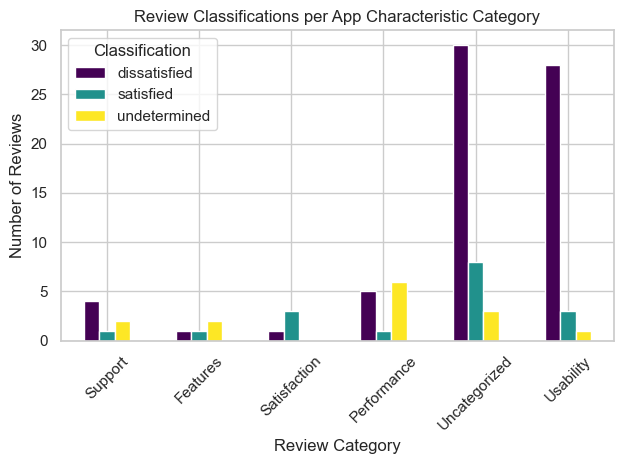

In [19]:
import matplotlib.pyplot as plt

category_rename = {
    "usability_user_experience": "Usability",
    "performance_stability": "Performance",
    "customer_support_communication": "Support",
    "features_functionality": "Features",
    "general_satisfaction_recommendation": "Satisfaction",
    "uncategorized": "Uncategorized"
}

# Prepare the data for plotting
category_counts_plot = df.groupby(['review_category', 'review_classification']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(12, 6))
ax = category_counts_plot.plot(kind='bar', stacked=False, colormap='viridis')
plt.title('Review Classifications per App Characteristic Category')
plt.xlabel('Review Category')
plt.ylabel('Number of Reviews')

# Rename the x-axis labels
ax.set_xticklabels([category_rename.get(label.get_text(), label.get_text()) for label in ax.get_xticklabels()])

plt.xticks(rotation=45)
plt.legend(title='Classification')
plt.tight_layout()
plt.show()